In [1]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [19]:
start_dt = date(2000, 1, 1)
end_dt = date(2023, 2, 1)

In [3]:
items = md.Explorer.countryList(['Brazil'])

In [6]:
md.Explorer.desc(items['Brazil'], start_dt, end_dt)

Total non NA data : 91
From 2015-01-31 to 2022-07-31
Theorical number of months : 91


last Date   last value n of values
yahoo  BRL=X                         2023-01-31       5.1457          97
manual bra_business_confidence_sa    2022-09-30        101.5          93
       bra_business_expectations_sa  2022-09-30        100.1          93
       bra_business_situation_sa     2022-09-30        102.0          93
       bra_cpi                       2022-08-31      6388.87          92
       bra_employment_leading_fgv    2022-09-30         83.8          93
       bra_extrativist               2022-08-31     86.72367          92
       bra_gdp_fgv                   2022-07-31        178.1          91
       bra_industry                  2022-08-31     84.80802          92
       bra_ip                        2022-08-31     86.21293          92
       bra_ppi_igp10                 2022-09-30     1200.867          93
       bra_ppi_igpdi                 2022-09-30     1173.793          93
       bra_ppi_igpm                  2022-09-30     1148.811          93
       bra_ppi_incc                  2022-09-30     1045.616          93
       bra_retail_sales              2022-08-31     98.47597          92
       bra_uncertainty               2022-09-30        111.7          93
       bra_uncertainty_expectations  2022-09-30        111.6          93
       bra_uncertainty_media         2022-09-30        110.6          93
bcb    bra_deliquency                2022-12-31         2.99          96
       bra_employment                2022-12-31   42716337.0          96
       bra_exports                   2022-12-31      27362.6          96
       bra_fdi                       2022-12-31       3651.7          96
       bra_fdi2                      2022-12-31       5570.0          96
       bra_imports                   2022-12-31      24209.1          96
       bra_ipca_MoM                  2022-12-31         0.62          96
       bra_m1                        2022-12-31  391522455.0          96
       bra_net_debt_to_gdp           2022-12-31        57.52          96
       bra_reserves                  2023-01-31     331122.0          97
       bra_trade_balance             2022-12-31       3153.6          96
       bra_unemployment_rate         2022-11-30          8.1          95

In [7]:
items = ['bra_trade_balance', 'bra_exports', 'bra_imports']

In [20]:
db = md.Explorer.listHistory(items, start_dt, end_dt)
trade = db.rolling(window = 12).sum().dropna()

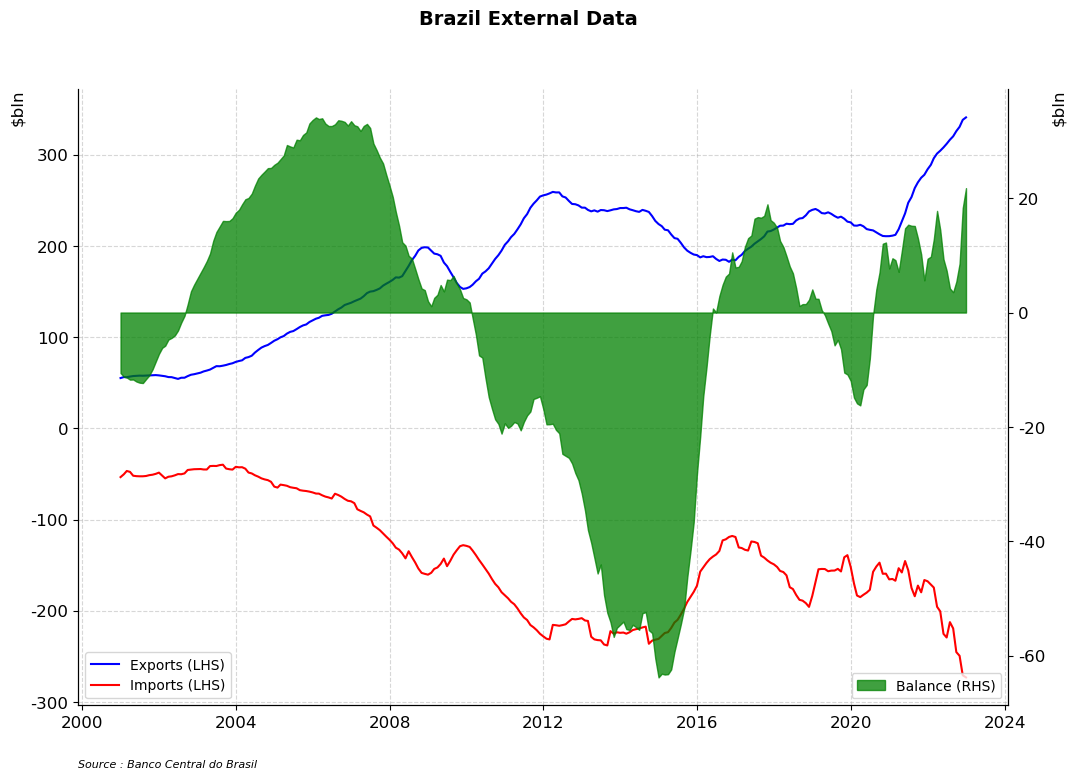

In [21]:
f, ax = plt.subplots(figsize = (12, 8))
f.suptitle('Brazil External Data\n', fontsize = 14, fontweight = 'bold')

ax.plot(trade.index, trade['bra_exports']/1000, color = 'blue', label = 'Exports (LHS)')
ax.plot(trade.index, -trade['bra_imports']/1000, color = 'red', label = 'Imports (LHS)')
ax2 = ax.twinx()
ax2.fill_between(trade.index, trade['bra_trade_balance']/1000, color = 'green', alpha = 0.75, label = 'Balance (RHS)')

ax.spines[['top']].set_visible(False)
ax2.spines[['top']].set_visible(False)

ax.grid(alpha = 0.5, ls = '--')

ax.legend(loc = 'lower left')
ax2.legend(loc = 'lower right')

ax.tick_params(axis='both', which='major', labelsize=12)
ax2.tick_params(axis='both', which='major', labelsize=12)

ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

ax.set_ylabel("$bln", loc='top', size=12)
ax2.set_ylabel("$bln", loc='top', size=12)

void = ax.text(0, -0.1, 'Source : Banco Central do Brasil',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

# plt.savefig('snpx10yr.pdf')

## FX RATE ANALYSES

In [23]:
import sys
import os
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import statsmodels.api as sm

from datetime import date
from numpy import log

sys.path.append(os.getcwd() + '/../..')
import macrodata as md

In [24]:
start_dt = date(2000, 1, 1)
end_dt = date(2023, 2, 1)

In [25]:
y_items = ['BRL=X']
X_items = ['bra_ppi_igpm', 'bra_ppi_igpdi', 'bra_ppi_igp10', 'bra_business_confidence_sa', 'bra_business_situation_sa', 'bra_business_expectations_sa',
        'bra_ppi_incc', 'bra_uncertainty', 'bra_uncertainty_media', 'bra_uncertainty_expectations', 
        'bra_employment_leading_fgv', 'bra_gdp_fgv', 'bra_cpi', 'bra_ip', 'bra_industry', 'bra_extrativist', 'bra_retail_sales',
        'bra_trade_balance', 'bra_exports', 'bra_imports']

In [33]:
X_items = md.Explorer.sourceList(['bcb'])['bcb']

In [36]:
X_items

['bra_exports',
 'bra_imports',
 'bra_ipca_MoM',
 'bra_reserves',
 'bra_net_debt_to_gdp',
 'bra_deliquency',
 'bra_trade_balance',
 'bra_fdi',
 'bra_fdi2',
 'bra_unemployment_rate',
 'bra_m1',
 'bra_employment']

In [34]:
y = md.Explorer.listHistory(y_items, start_dt, end_dt)
X = md.Explorer.listHistory(X_items, start_dt, end_dt)

In [37]:
# diff = ['bra_ppi_igpm', 'bra_ppi_igpdi', 'bra_ppi_igp10', 'bra_ppi_incc',
#         'bra_gdp_fgv', 'bra_cpi', 'bra_ip', 'bra_industry', 'bra_extrativist', 'bra_retail_sales']
# X.loc[:, diff] = X.loc[:, diff].apply(lambda x : log(x), axis = 1).diff()
X.dropna(inplace = True)
y = y.loc[X.index]
X = sm.add_constant(X)

In [41]:
# Interactive process
X = X.loc[:, X.columns != 'bra_fdi2']

In [42]:
model = sm.OLS(y, X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  BRL=X   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     171.1
Date:                Thu, 09 Feb 2023   Prob (F-statistic):           2.70e-65
Time:                        10:03:27   Log-Likelihood:                -26.604
No. Observations:                 129   AIC:                             75.21
Df Residuals:                     118   BIC:                             106.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -1.5433      2.673     -0.577      0.565      -6.837       3.750
bra_exports           -7.004e-05   1.24e-05     -5.671      0.000   -9.45e-05   -4.56e-05
bra_ipca_MoM             -0.0825      0.082     -1.010      0.315      -0.244       0.079
bra_reserves          -1.391e-05   3.76e-06     -3.704      0.000   -2.14e-05   -6.48e-06
bra_net_debt_to_gdp       0.0403      0.009      4.383      0.000       0.022       0.059
bra_deliquency           -0.3273      0.125     -2.615      0.010      -0.575      -0.079
bra_trade_balance      3.622e-05   1.64e-05      2.205      0.029     3.7e-06    6.87e-05
bra_fdi               -6.738e-05   1.41e-05     -4.770      0.000   -9.54e-05   -3.94e-05
bra_unemployment_rate     0.1054      0.041      2.542      0.012       0.023       0.187
bra_m1                 4.761e-09   1.67e-09      2.853      0.005    1.46e-09    8.07e-09
bra_employment         2.215e-07   4.87e-08      4.549      0.000    1.25e-07    3.18e-07
==============================================================================
Omnibus:                        6.849   Durbin-Watson:                   0.917
Prob(Omnibus):                  0.033   Jarque-Bera (JB):                6.415
Skew:                           0.514   Prob(JB):                       0.0405
Kurtosis:                       3.370   Cond. No.                     2.90e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.9e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

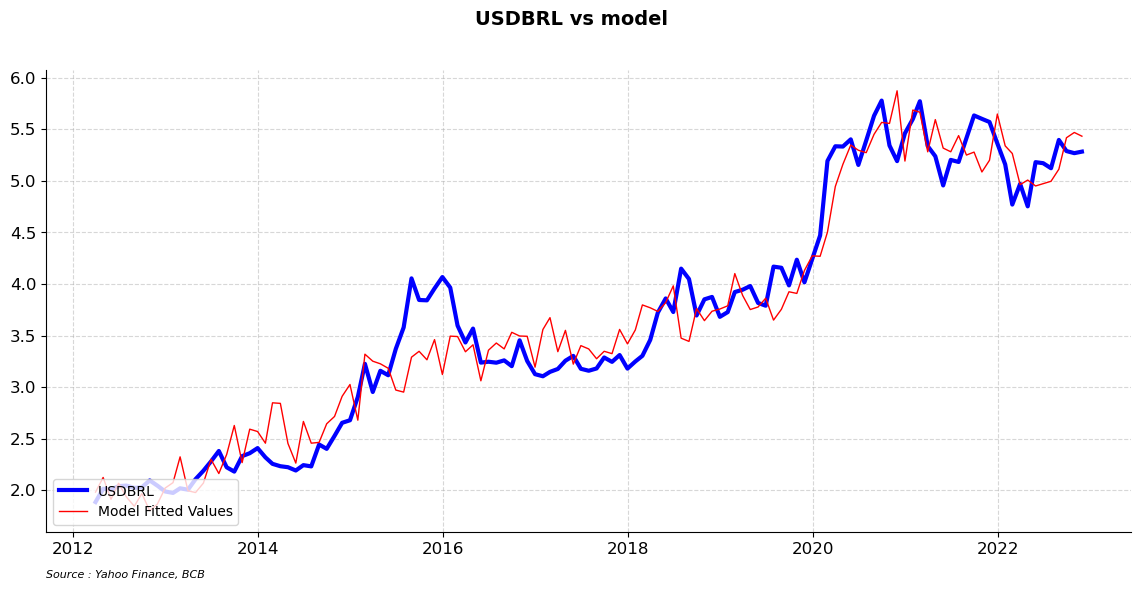

In [43]:
f, ax = plt.subplots(figsize=(14,6))
f.suptitle('USDBRL vs model', fontsize = 14, fontweight = 'bold')

ax.plot(y.index, y, color = 'blue', lw = 3, label = 'USDBRL')
ax.plot(y.index, model.predict(), color = 'r', lw = 1, label = 'Model Fitted Values')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(alpha = 0.5, ls = '--')
ax.legend(loc = 'lower left')

void = plt.xticks(fontsize=12)
void = plt.yticks(fontsize=12)

void = ax.text(0, -0.1, 'Source : Yahoo Finance, BCB',
              fontstyle = 'italic',
              fontsize = 8,
              transform = ax.transAxes)

# plt.savefig('BRLFXModel.pdf')